<a href="https://colab.research.google.com/github/Navanithapatel/AD/blob/main/pythonday18_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pandas import read_csv
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression
dataframe=sns.load_dataset('tips')
dataframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
import pandas as pd
data=pd.read_csv(r"/content/NewspaperData.csv")
data.head()


,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
data.shape

(34, 3)

In [5]:
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [6]:
data.tail()

,Newspaper,daily,sunday
29,San Francisco Chronicle,570.364,704.322
30,St. Louis Post-Dispatch,391.286,585.681
31,St. Paul Pioneer Press,201.860,267.781
32,Tampa Tribune,321.626,408.343
33,Washington Post,838.902,1165.567


In [7]:
data[10:15]

,Newspaper,daily,sunday
10,Houston Chronicle,449.755,620.752
11,Kansas City Star,288.571,423.305
12,Los Angeles Daily News,185.736,202.614
13,Los Angeles Times,1164.388,1531.527
14,Miami Herald,444.581,553.479


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [8]:
data.sample(33)

,Newspaper,daily,sunday
19,Newsday,825.512,960.308
12,Los Angeles Daily News,185.736,202.614
1,Boston Globe,516.981,798.298
22,Philadelphia Inquirer,515.523,982.663
20,Omaha World Herald,223.748,284.611
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
10,Houston Chronicle,449.755,620.752
3,Charlotte Observer,238.555,299.451
30,St. Louis Post-Dispatch,391.286,585.681


In [10]:
data.sample(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
25,Providence Journal-Bulletin,197.120,268.060
24,Portland Oregonian,337.672,440.923
11,Kansas City Star,288.571,423.305
8,Des Moines Register,206.204,344.522
3,Charlotte Observer,238.555,299.451
18,New York Times,1209.225,1762.015
28,Sacramento Bee,273.844,338.355
4,Chicago Sun Times,537.780,559.093
27,Rocky Mountain News,374.009,432.502


In [11]:
data.drop('Newspaper',axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import matplotlib.pyplot as plt

<Axes: xlabel='daily', ylabel='Density'>

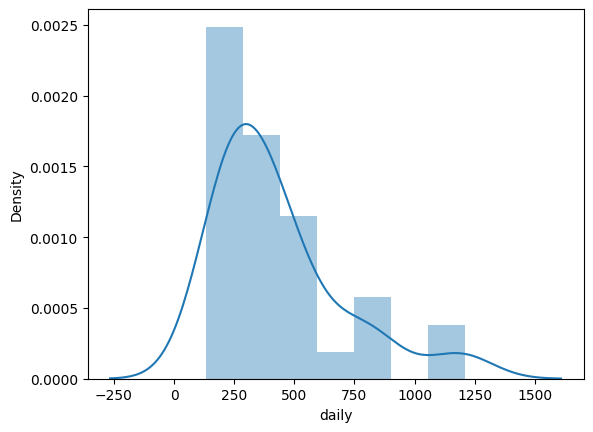

In [14]:
sns.distplot(data['daily'])

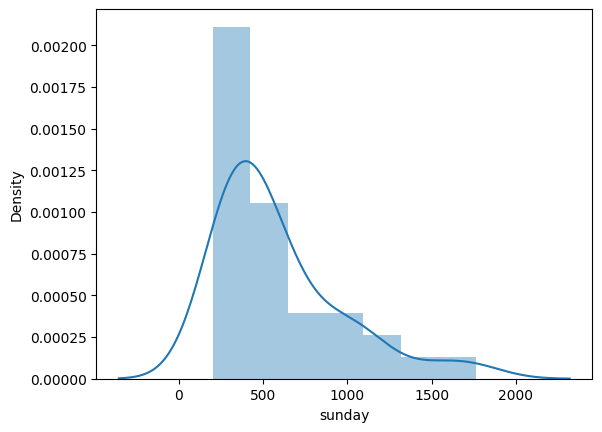

In [15]:
sns.distplot(data['sunday'])
plt.show()

In [16]:
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data = data).fit()

<Axes: xlabel='daily', ylabel='sunday'>

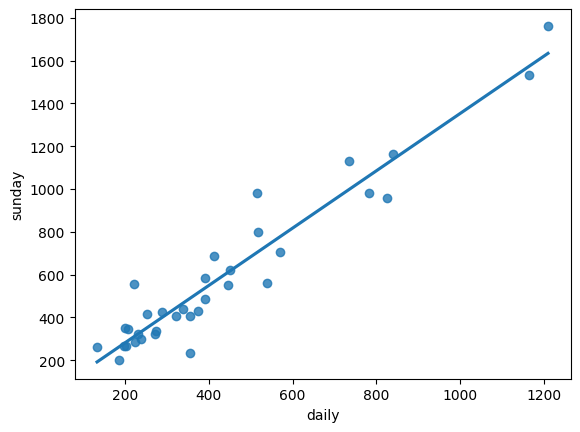

In [17]:
sns.regplot(x="daily", y="sunday" ,data=data,ci=None)

In [18]:
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [19]:
model.params #coefficients

,0
Intercept,13.835630
daily,1.339715


In [20]:
print(model.tvalues,'\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [21]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [22]:
model.params

,0
Intercept,13.835630
daily,1.339715


In [24]:
Y=mX+C
m= coef of X
C= constant intercept

In [26]:
model.rsquared

0.9180596895873295

In [28]:
sunday=1.339715*1000_13.835630
sunday

133990.03580104545

In [29]:
sunday

133990.03580104545

In [31]:
newdata=pd.Series([1000,3000,500,1500,4000])
newdata

,0
0,1000
1,3000
2,500
3,1500
4,4000


In [33]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,1000
1,3000
2,500
3,1500
4,4000


In [35]:
data.shape

(34, 3)

In [36]:
newdata.shape

(5,)

In [38]:
data_pred.shape

(5, 1)

In [39]:
model.predict(data_pred)

,0
0,1353.550388
1,4032.979903
2,683.693009
3,2023.407766
4,5372.694661


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
data.head(6)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249


In [45]:
lr=LinearRegression()
lr.fit(data[['daily']],data['sunday'])

LinearRegression()

In [46]:
data[['daily']]

,daily
0,391.952
1,516.981
2,355.628
3,238.555
4,537.780
5,733.775
6,198.832
7,252.624
8,206.204
9,231.177


In [47]:
type(data[['daily']])

pandas.core.frame.DataFrame

In [48]:
type(data['daily'])

pandas.core.series.Series

In [49]:
lr.predict(data_pred)

array([1353.55038759, 4032.97990296,  683.69300875, 2023.40776644,
       5372.69466065])

In [52]:
lr.intercept_

13.835629909636168

In [53]:
lr.coef_

array([1.33971476])